# График incentive

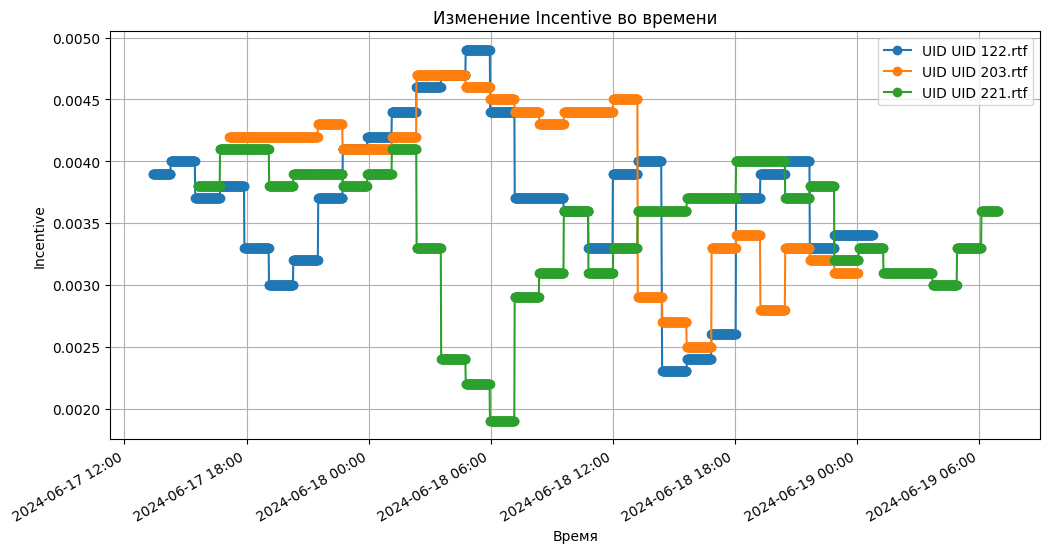

         filename           timestamp  incentive  time_diff
0     UID 122.rtf 2024-06-17 13:23:15     0.0039        NaN
1     UID 122.rtf 2024-06-17 13:24:27     0.0039       72.0
2     UID 122.rtf 2024-06-17 13:25:37     0.0039       70.0
3     UID 122.rtf 2024-06-17 13:26:48     0.0039       71.0
4     UID 122.rtf 2024-06-17 13:28:00     0.0039       72.0
...           ...                 ...        ...        ...
5405  UID 221.rtf 2024-06-19 06:52:41     0.0036       70.0
5406  UID 221.rtf 2024-06-19 06:53:51     0.0036       70.0
5407  UID 221.rtf 2024-06-19 06:55:01     0.0036       70.0
5408  UID 221.rtf 2024-06-19 06:56:17     0.0036       76.0
5409  UID 221.rtf 2024-06-19 06:57:26     0.0036       69.0

[5410 rows x 4 columns]


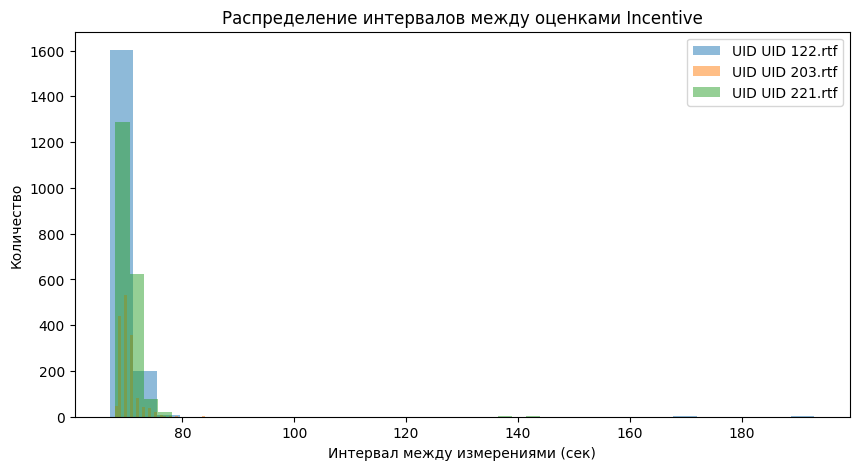

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_incentive(df):
    plt.figure(figsize=(12,6))
    for uid, group in df.groupby('filename'):
        plt.plot(group['timestamp'], group['incentive'], marker='o', label=f'UID {uid}')
    plt.xlabel('Время')
    plt.ylabel('Incentive')
    plt.title('Изменение Incentive во времени')
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.gcf().autofmt_xdate()
    plt.show()

def analyze_intervals(df):
    df_sorted = df.sort_values(['filename', 'timestamp']).copy()
    df_sorted['time_diff'] = df_sorted.groupby('filename')['timestamp'].diff().dt.total_seconds()
    
    print(df_sorted[['filename', 'timestamp', 'incentive', 'time_diff']])
    
    plt.figure(figsize=(10,5))
    for uid, group in df_sorted.groupby('filename'):
        group['time_diff'].dropna().plot(kind='hist', bins=30, alpha=0.5, label=f'UID {uid}')
    
    plt.xlabel('Интервал между измерениями (сек)')
    plt.ylabel('Количество')
    plt.title('Распределение интервалов между оценками Incentive')
    plt.legend()
    plt.show()

def main():
    # Загрузка данных
    df = pd.read_excel('all_incentive.xlsx')

    # Попытка распарсить несколько форматов
    def parse_dates(series):
        for fmt in ['%m/%d/%Y %I:%M:%S %p', '%Y-%m-%d %H:%M:%S']:
            try:
                return pd.to_datetime(series, format=fmt)
            except ValueError:
                continue
        # fallback: авто-распознавание
        return pd.to_datetime(series, errors='coerce', infer_datetime_format=True)

    df['timestamp'] = parse_dates(df['timestamp'])

    
    plot_incentive(df)
    analyze_intervals(df)

if __name__ == '__main__':
    main()


# График Reward/Penalty

### В данных заменено значение reward_value = -5, которе майнер 203 получил в 2024-06-18 12:17:47.930 от заказчика 199, на reward_value = 0, тк график становится нечитабельным

/var/folders/r6/nbcwv6cs5lsdsxghdf10sz8m0000gn/T/ipykernel_34857/2098128510.py:46: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(series, errors='coerce', infer_datetime_format=True)


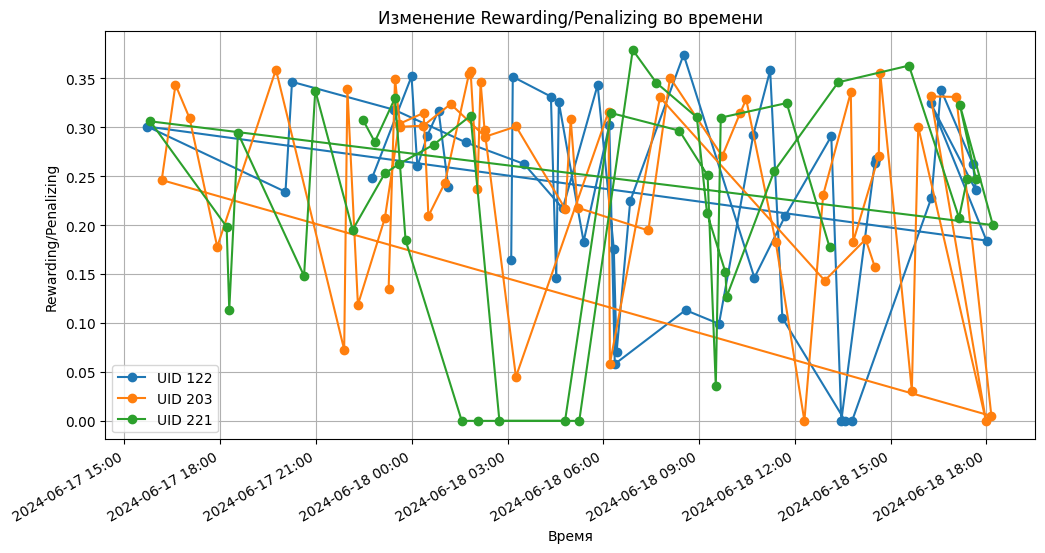

     miner_id               timestamp  reward_value  time_diff
28        122 2024-06-17 15:43:04.686      0.300647        NaN
29        122 2024-06-17 20:02:34.332      0.233958  15569.646
30        122 2024-06-17 20:14:50.047      0.346346    735.715
0         122 2024-06-17 22:45:25.081      0.248423   9035.034
31        122 2024-06-17 23:26:48.509      0.317815   2483.428
..        ...                     ...           ...        ...
115       221 2024-06-18 17:08:24.661      0.207512   5646.589
118       221 2024-06-18 17:10:03.793      0.322657     99.132
116       221 2024-06-18 17:23:35.184      0.246868    811.391
117       221 2024-06-18 17:40:08.402      0.247173    993.218
119       221 2024-06-18 18:12:01.240      0.199990   1912.838

[140 rows x 4 columns]


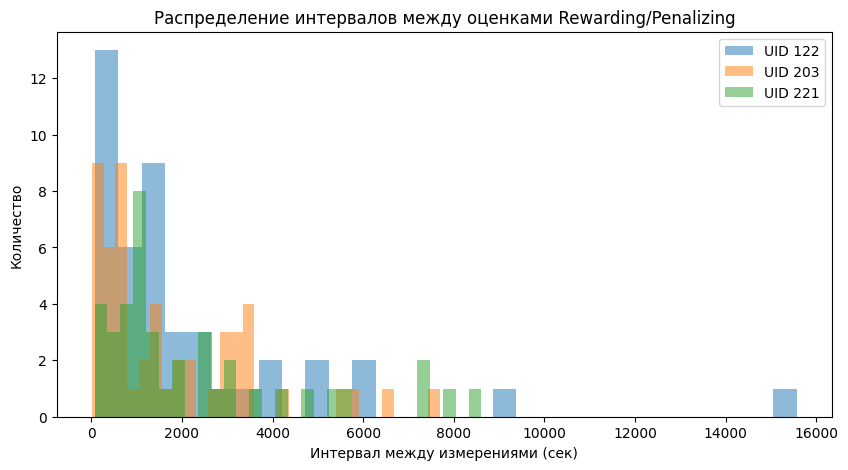

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_incentive(df):
    plt.figure(figsize=(12,6))
    for uid, group in df.groupby('miner_id'):
        plt.plot(group['timestamp'], group['reward_value'], marker='o', label=f'UID {uid}')
    plt.xlabel('Время')
    plt.ylabel('Rewarding/Penalizing')
    plt.title('Изменение Rewarding/Penalizing во времени')
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.gcf().autofmt_xdate()
    plt.show()

def analyze_intervals(df):
    df_sorted = df.sort_values(['miner_id', 'timestamp']).copy()
    df_sorted['time_diff'] = df_sorted.groupby('miner_id')['timestamp'].diff().dt.total_seconds()
    
    print(df_sorted[['miner_id', 'timestamp', 'reward_value', 'time_diff']])
    
    plt.figure(figsize=(10,5))
    for uid, group in df_sorted.groupby('miner_id'):
        group['time_diff'].dropna().plot(kind='hist', bins=30, alpha=0.5, label=f'UID {uid}')
    
    plt.xlabel('Интервал между измерениями (сек)')
    plt.ylabel('Количество')
    plt.title('Распределение интервалов между оценками Rewarding/Penalizing')
    plt.legend()
    plt.show()

def main():
    # Загрузка данных
    df = pd.read_excel('all_reward_penalty.xlsx')

    # Попытка распарсить несколько форматов
    def parse_dates(series):
        for fmt in ['%m/%d/%Y %I:%M:%S %p', '%Y-%m-%d %H:%M:%S']:
            try:
                return pd.to_datetime(series, format=fmt)
            except ValueError:
                continue
        # fallback: авто-распознавание
        return pd.to_datetime(series, errors='coerce', infer_datetime_format=True)

    df['timestamp'] = parse_dates(df['timestamp'])

    # Фильтрация только нужных UID
    target_uids = [122, 203, 221]
    df_filtered = df[df['miner_id'].isin(target_uids)]

    plot_incentive(df_filtered)
    analyze_intervals(df_filtered)

if __name__ == '__main__':
    main()


In [18]:
# Корреляционные матрицы

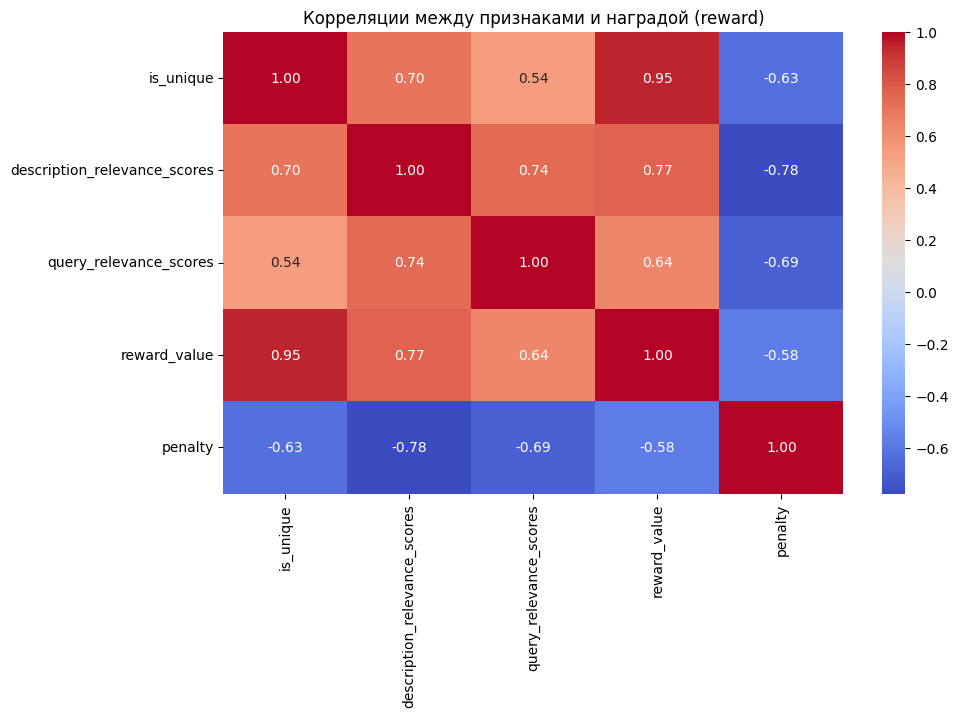

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("all_reward_penalty.xlsx")

# Корреляции между числовыми полями
corr = df[['is_unique', 'description_relevance_scores', 'query_relevance_scores', 'reward_value', 'penalty']].corr()

# Отобразим корреляционную матрицу
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляции между признаками и наградой (reward)")
plt.show()



# Ключевые выводы из матрицы:

#### 1. Очень сильная положительная корреляция (близко к 1)

is_unique с reward_value: 0.95

Вывод: Уникальность контента (is_unique) невероятно сильно связана с высоким вознаграждением. Система явно и очень щедро поощряет уникальные материалы. А для избежания штрафа необходимо отправить хотя бы одно видео. Это необходимое условие, так как при отсутствии видео штраф начисляется автоматически.

#### 2. Сильная положительная корреляция (0.7 - 0.9)

description_relevance_scores с reward_value: 0.77 и с is_unique: 0.70

query_relevance_scores с description_relevance_scores: 0.74

Вывод: Релевантность описания и запроса — важные факторы для получения высокой награды. Также видно, что эти два показателя релевантности тесно связаны друг с другом (логично: хорошее описание обычно релевантно запросу).

#### 3. Сильная отрицательная корреляция (близко к -1)
penalty с description_relevance_scores: -0.78

penalty с query_relevance_scores: -0.69

penalty с is_unique: -0.63

Вывод: Низкие оценки активно выдаются за нерелевантные описания и запросы, а также за неуникальный контент. Чем хуже качество видео, тем меньше итоговая награда.

#### 4. Умеренная отрицательная корреляция
reward_value с penalty: -0.58

Вывод: Корреляция между наградой и штрафом умеренно отрицательная, что ожидаемо (штраф снижает итоговое вознаграждение), но не является строго линейной (что может указывать на сложную формулу расчета).
